## Preparing data

In [1]:
import json
import torch
import pandas as pd
from tqdm import tqdm
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt

def return_inds(strings, list):
    return [i for i,l in enumerate(list) if l in strings] 

In [2]:
benchs = ['BBH', 'LMentry', 'MMLU'] #, 'LMentry'
names = {0:['TRIPLE-GSE-OneHot', 'TRIPLE-GSE-discrete', 'TRIPLE-GSE-EmbPT'],
         1:['TRIPLE-MLP-GSE-OneHot', 'TRIPLE-MLP-GSE-discrete', 'TRIPLE-MLP-GSE-EmbPT'],
        2:['PE-OneHot', 'PE-discrete', 'PE-EmbPT']}

ns = [200, 400, 800, 1600]

style = {"markersize":3, "markeredgewidth":1, "linewidth":1, "linestyle":'-'}
markers = ['o', 'v', '*', 'x', 's', 'p', 'd', '^']
color_mappings = {
    'TRIPLE-GSE-OneHot': '#8c564b', 
    'TRIPLE-GSE-discrete':'grey', 
    'TRIPLE-GSE-EmbPT':'black',
    'TRIPLE-MLP-GSE-OneHot': '#2ca02c', 
    'TRIPLE-MLP-GSE-discrete':'#d62728', 
    'TRIPLE-MLP-GSE-EmbPT':'yellow',
    'PE-OneHot': '#1f77b4', 
    'PE-discrete': '#ff7f0e',
    'PE-EmbPT': '#9467bd',
    'PE-EmbFT': '#d62728'
}

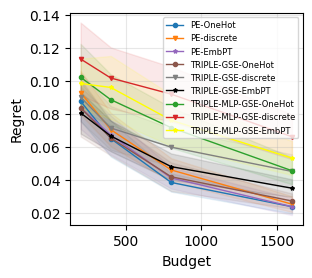

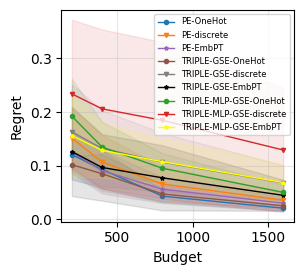

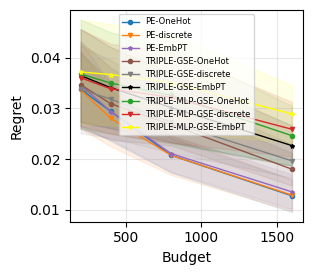

In [3]:
for k,bench in enumerate(benchs):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 2.75))
    ax = axes
    
    ####
    errors = np.load(f"../results/bai_processed_results_{bench}.npy")
    #(task, sample size, covariates, methos)
    n_covs = errors.shape[2]

    for m in [2,0,1]:
        results = errors[:,:,:,m]

        avgs = results.mean(0)
        stds = results.std(0)
    
        ####
        for i,name in enumerate(names[m]):
    
            ax.plot(ns, avgs.T[i], label=name, color = color_mappings[name], marker=markers[i],  **style)
            ax.fill_between(ns, avgs.T[i]-stds.T[i], avgs.T[i]+stds.T[i], color = color_mappings[name], alpha=.1)
            #ax.set_ylim(0,.15)
            #ax.set_title(bench)
            ax.set_ylabel("Regret")
            ax.set_xlabel("Budget")
            ax.grid(alpha=.3)

    
    plt.legend(prop={'size':6})
    #plt.tight_layout()  # Adjust layout to not overlap
    plt.savefig(f'../plots/bai-{bench}.pdf', bbox_inches='tight', dpi=400, transparent=True)
    
    plt.show()